# Assignment 1

## Module 1

## By: Gus Womeldorph

### The data used in this assignment is of water elevation at Arrowrock Reservoir from 2006 to 2016.


# 1. Import Data and Plot

In [1]:
import pandas as pd #import all necessary libraries
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm

In [2]:
df = pd.read_csv('ArrowrockReservoirElevation.csv', names=['Elevation','Y','M','D'], skiprows=1) #read in csv with Elevation data
df['SerDates'] = pd.to_datetime(df.Y*10000+df.M*100+df.D,format='%Y%m%d') #Define the datetime format

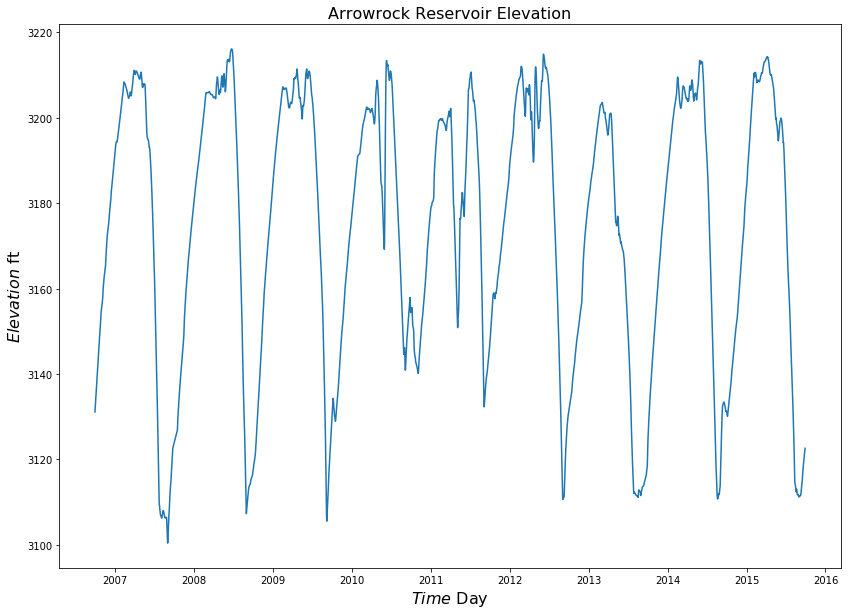

In [3]:
E = df['Elevation'].values #Set variable for Elevation data
Time = df['SerDates'].values #Set variable for Time component of elevation data
Et   = E[1:-1] 
T   = Time[1:-1] 
plt.figure(figsize=(14,10)) #Call figure and plot elevation data over time
plt.plot(T,Et)
plt.title('Arrowrock Reservoir Elevation',fontsize=16)
plt.xlabel('$Time$ Day',fontsize=16)
plt.ylabel('$Elevation$ ft',fontsize=16)
plt.show()

## 2. Compute and Report Key Statistics

In [4]:
Mean_Elev = np.mean(Et)
Mean_Elev

3174.7757503805174

In [5]:
Var = np.var(Et)
Var

1008.3724458676749

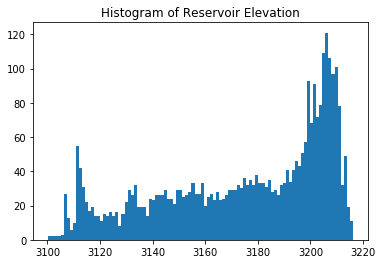

In [6]:
plt.hist(E, bins=100)  # plot histogram of reservoir elevations
plt.title("Histogram of Reservoir Elevation") # add title to histogram
plt.show() #show histogram

# 3. Implement and report Augmented Dickey-Fuller Test to look for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(E)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    

ADF Statistic: -5.522391
p-value: 0.000002
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


The ADF statistic of the Arrowrock Reservoir elevation dataset is smaller than each of the critical values, indicating that the null hypothesis of non-stationarity is incorrect, thus the dataset is stationary.

# 4. Compute and Plot Autocorrelation Test

## Correlation over a 1-day lag

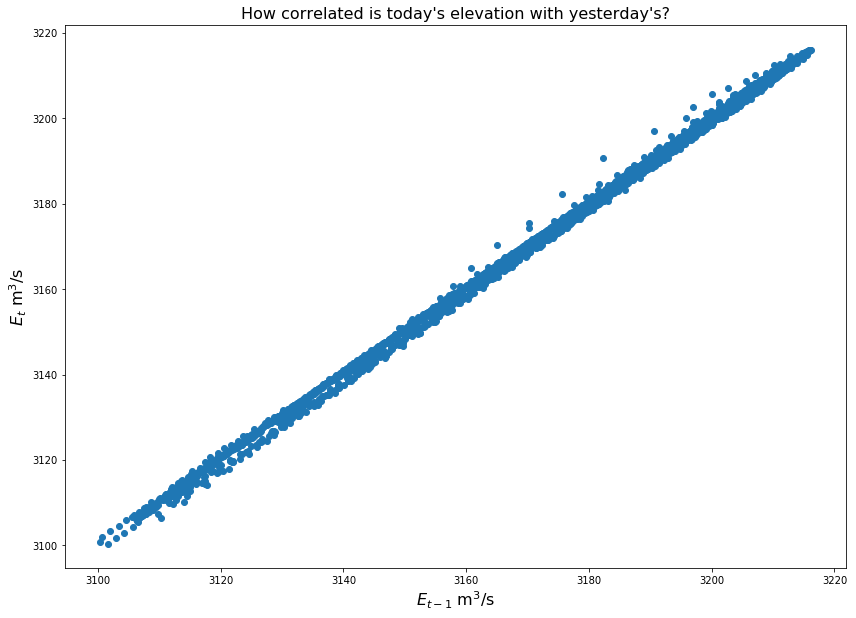

In [8]:

# Use numpy array indexing to get discharge from October 1, 2006 to September 30, 2016. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
Et   = E[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
Etm1 = E[0:-2]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Etm1,Et,'o')
plt.title('How correlated is today\'s elevation with yesterday\'s?',fontsize=16)
plt.xlabel('$E_{t-1}$ m$^3$/s',fontsize=16)
plt.ylabel('$E_t$ m$^3$/s',fontsize=16)
plt.show()

In [9]:
R = np.corrcoef(Etm1,Et)
R[1,0]

0.99956091857369045

## Correlation over a 40-day lag

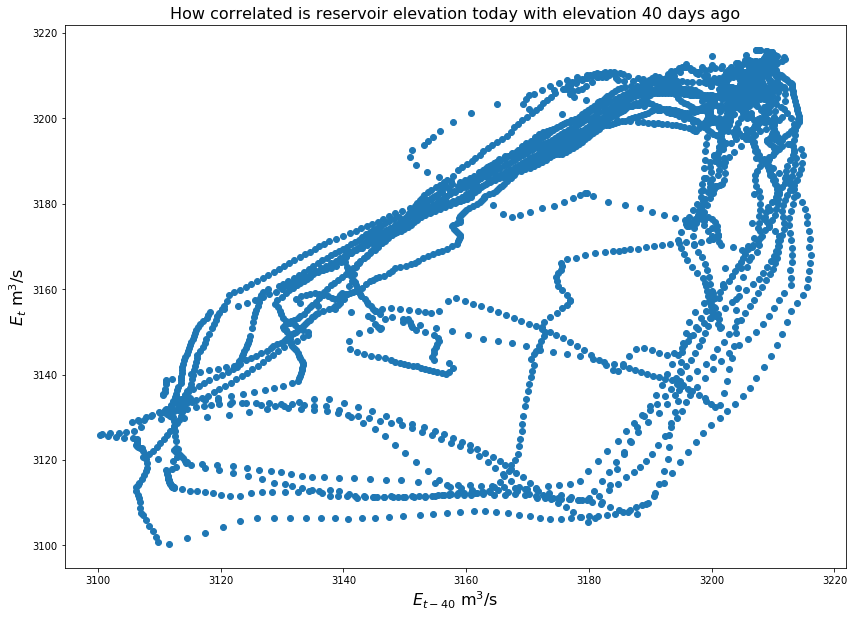

In [10]:
# Index data with 40 day lags
Et   = E[40:-1] 
Etmk = E[0:-(41)]

# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(Etmk,Et,'o')
plt.title('How correlated is reservoir elevation today with elevation 40 days ago',fontsize=16)
plt.xlabel('$E_{t-40}$ m$^3$/s',fontsize=16)
plt.ylabel('$E_t$ m$^3$/s',fontsize=16)
plt.show()

In [11]:
R = np.corrcoef(Etmk,Et)
R[1,0]

0.65340013934250896

## Autocorrelation plot for 40-day lag

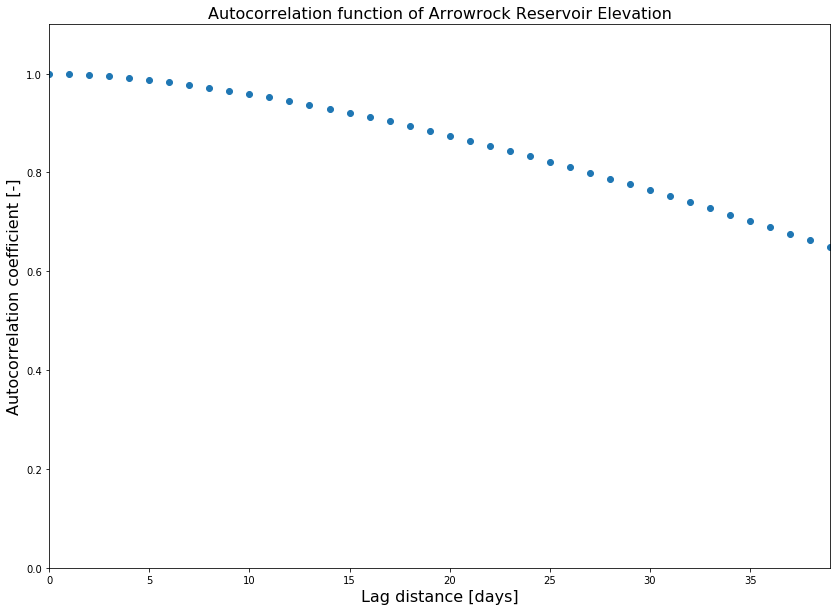

In [12]:
Nk = 40 # Set 40 day lag
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K: 
    Et   = E[k:-1] 
    Etmk = E[0:-(1+k)]
    R = np.corrcoef(Etmk,Et)
    Rk[k] = R[1,0]

Ep = E - np.mean(E) 

autocovs2 = np.correlate(Ep, Ep, mode='full') 

N = autocovs2.size

autocovs2_oneside = autocovs2[N//2:]

autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10))
plt.plot(K,autocorrs2_oneside[0:Nk],'o')
plt.ylim(0.0,1.1)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.title('Autocorrelation function of Arrowrock Reservoir Elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

## Autocorrelation plot for up to 7 year lag

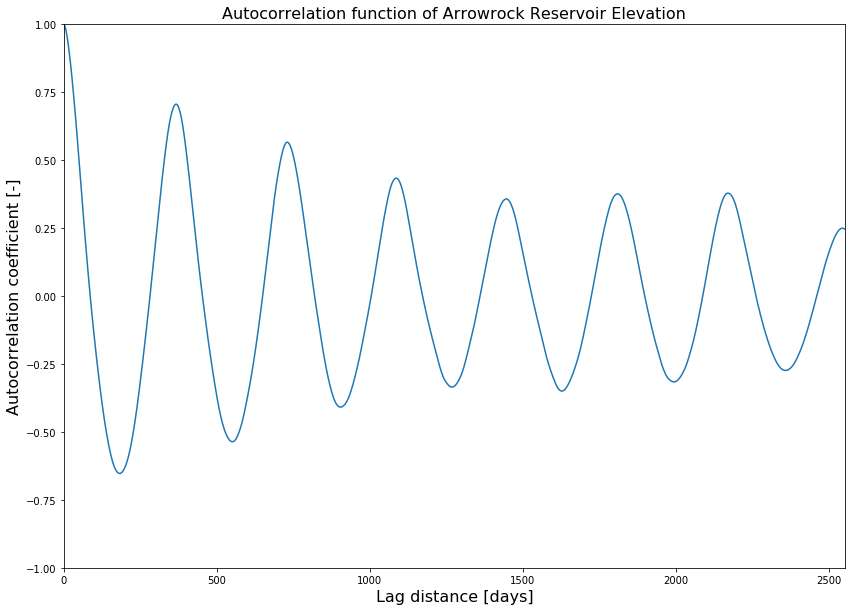

In [13]:
Nk2 = 365*7 # Set new timeframe for 7 years
K2 = np.arange(0,Nk2,1)

# Plot Autocorrelation Coefficient over 7 years 

plt.figure(figsize=(14,10))
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of Arrowrock Reservoir Elevation',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

## 5. Discuss
The autocorrelation analysis of the water elevation data of Arrowrock Reservoir reveals a cyclical nature in which a given measurement likely correlates more with a measurement a year from that time rather than with a measurement a month from that time. This is intuitive as the nature of water in the mountainous west precipitates in a cyclical way and this is mirrored in water bodies such as reservoirs. There may be short term (yearly) trends in high and low water levels, but there likely is no perceivable trend among the entire dataset (10 years). 